In [821]:
#import the library
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [822]:
#read the data
df = pd.read_csv(r'E:\_Portofolio\PortofolioProject\Movie\movies.csv')
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [823]:
#looking at missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [824]:
#drop the null
df = df.dropna()

In [825]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [826]:
#data Types for each columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [827]:
#alter the data types
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [828]:
#the 'year' column not similar with the year in the 'realeased' column, for context look at row 8
#create 'yearCorrect' column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df['yearcorrect'].unique()

array([1980, 1981, 1984, 1983, 1982, 1987, 1985, 1986, 1990, 1988, 1992,
       1989, 1991, 1999, 1994, 1993, 1995, 2001, 1996, 2000, 1997, 1998,
       2002, 2003, 2004, 2019, 2014, 2005, 2006, 2007, 2008, 2010, 2009,
       2013, 2011, 2016, 2015, 2012, 2017, 2018, 2020])

In [829]:
df['yearcorrect'].dtypes

dtype('int32')

In [830]:
df = df.drop(['year'], axis=1)

In [831]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [832]:
df.head().sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [833]:
pd.set_option('display.max_rows', None)

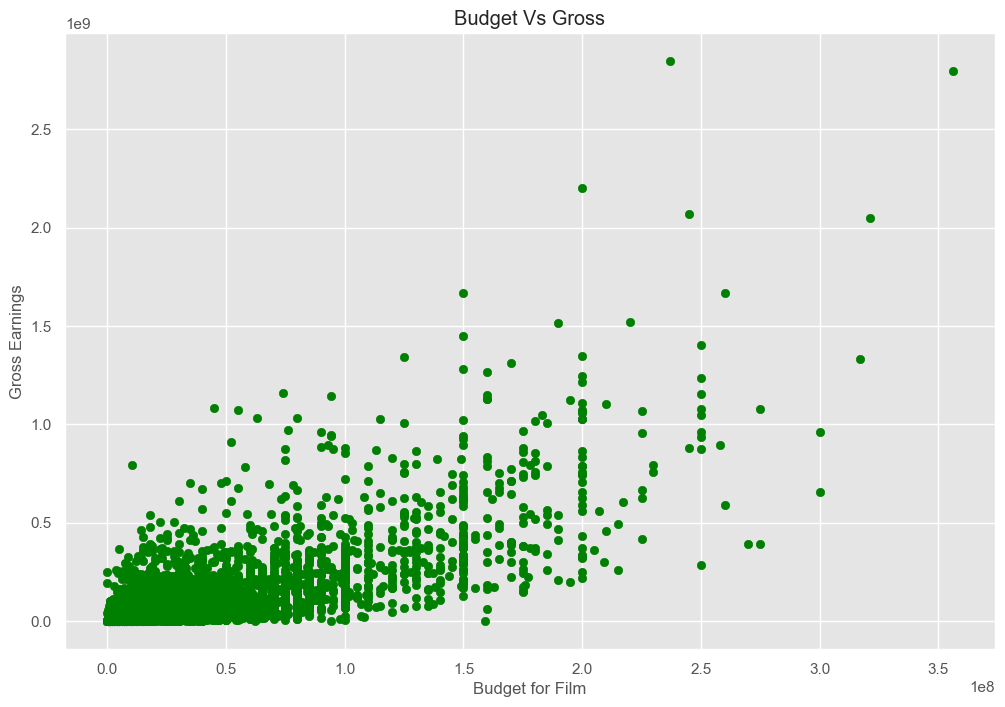

In [834]:
#scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'], c='green')
plt.title('Budget Vs Gross')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

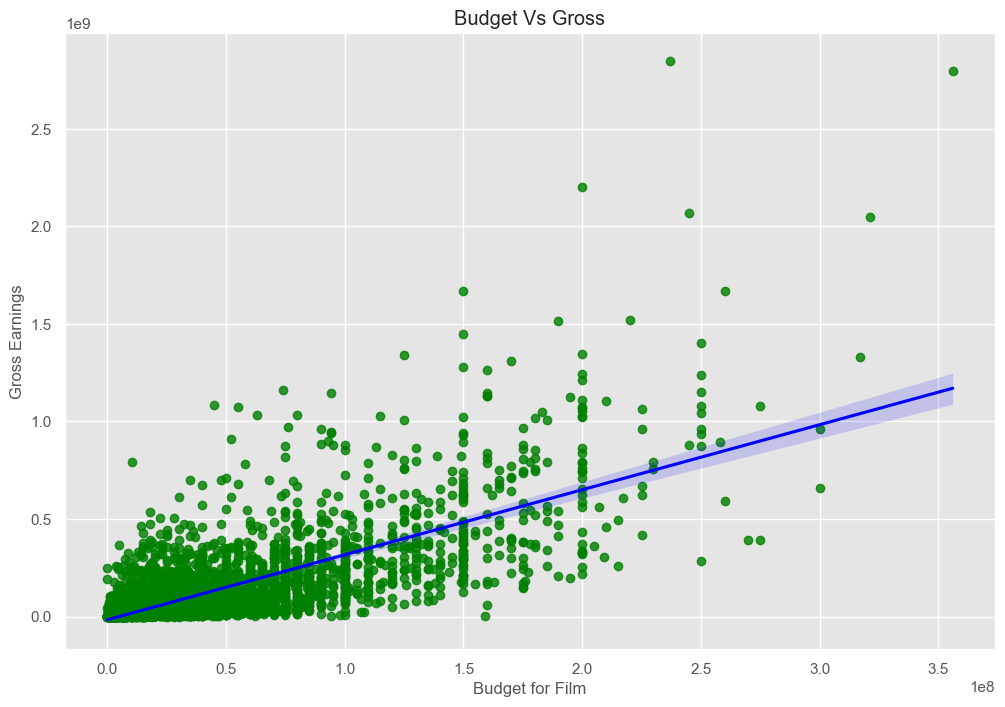

In [835]:
#plot budget vs gross correlation
ax = sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"green"}, line_kws={"color":"blue"})
ax.set(xlabel='Budget for Film',
       ylabel='Gross Earnings',
       title='Budget Vs Gross')
plt.show()

Most of the movies lay on top of the blue line, indicate that those movies make a profit

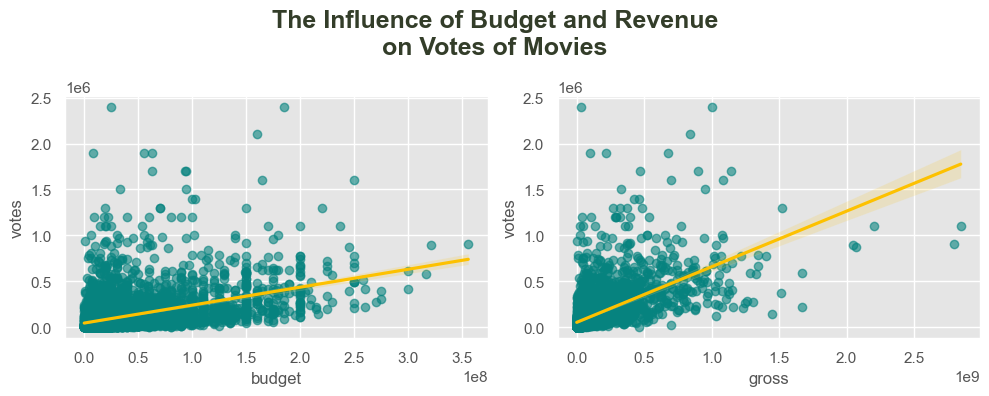

In [836]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('The Influence of Budget and Revenue\non Votes of Movies', fontsize=18, weight=600, color='#333d29')
for i, col in enumerate(['budget', 'gross']):
    sns.regplot(data=df, x=col, y='votes',
                scatter_kws={"color": "#06837f", "alpha": 0.6}, line_kws={"color": "#fdc100"}, ax=axes[i])

plt.tight_layout()

Budget and Gross influence by the votes of the movies

In [837]:
#Top 15 categories
top_10_genre = df['genre'].value_counts().head(10)
top_10_genre

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Name: genre, dtype: int64

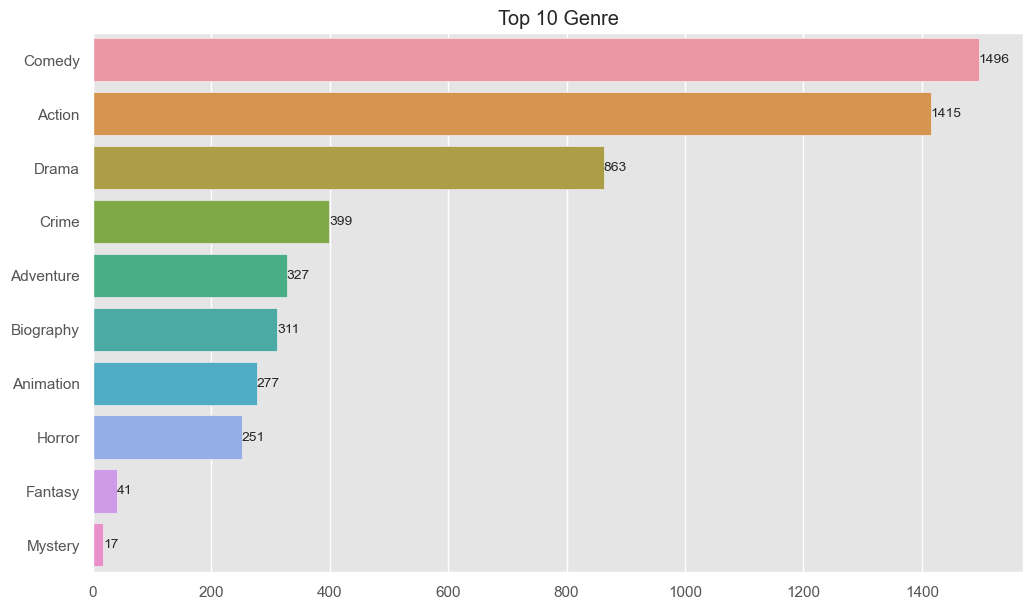

In [838]:
plt.figure(figsize = (12, 7))
ax = sns.barplot(x = top_10_genre.values, y = top_10_genre.index)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Top 10 Genre")
plt.show()

In [839]:
dataframe = pd.DataFrame({'genre': top_10_genre.index,
                          'count': top_10_genre.values})
dataframe

,genre,count
0,Comedy,1496
1,Action,1415
2,Drama,863
3,Crime,399
4,Adventure,327
5,Biography,311
6,Animation,277
7,Horror,251
8,Fantasy,41
9,Mystery,17


<Axes: ylabel='count'>

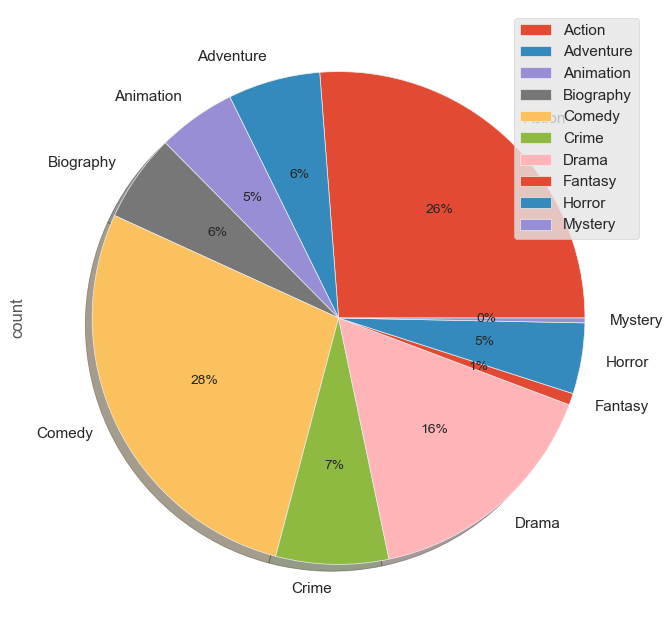

In [840]:
dataframe.groupby(['genre']).sum().plot(
    kind='pie', y='count', autopct='%1.0f%%', shadow=True)

In [841]:
#Top 10 star
top_10_star = df['star'].value_counts().head(10)

#Top 10 director
top_10_director = df['director'].value_counts().head(10)

#Top 10 writer
top_10_writer = df['writer'].value_counts().head(10)

#Top 10 country
top_10_country = df['country'].value_counts().head(10)

In [842]:
print(top_10_star,"\n\n",top_10_director,"\n\n",top_10_writer,"\n\n",top_10_country)

Nicolas Cage          40
Tom Hanks             38
Robert De Niro        38
Bruce Willis          34
Tom Cruise            33
Denzel Washington     33
Sylvester Stallone    32
Johnny Depp           31
Adam Sandler          28
Eddie Murphy          27
Name: star, dtype: int64 

 Woody Allen          33
Clint Eastwood       31
Steven Spielberg     27
Steven Soderbergh    23
Ridley Scott         23
Ron Howard           23
Joel Schumacher      20
Tim Burton           19
Martin Scorsese      19
Barry Levinson       18
Name: director, dtype: int64 

 Woody Allen           32
Stephen King          29
John Hughes           20
Luc Besson            14
Joel Coen             13
Wes Craven            12
David Mamet           11
M. Night Shyamalan    11
Quentin Tarantino     11
Robert Rodriguez      11
Name: writer, dtype: int64 

 United States     4319
United Kingdom     492
Canada             111
France             105
Germany             82
Australia           42
Japan               28
China    

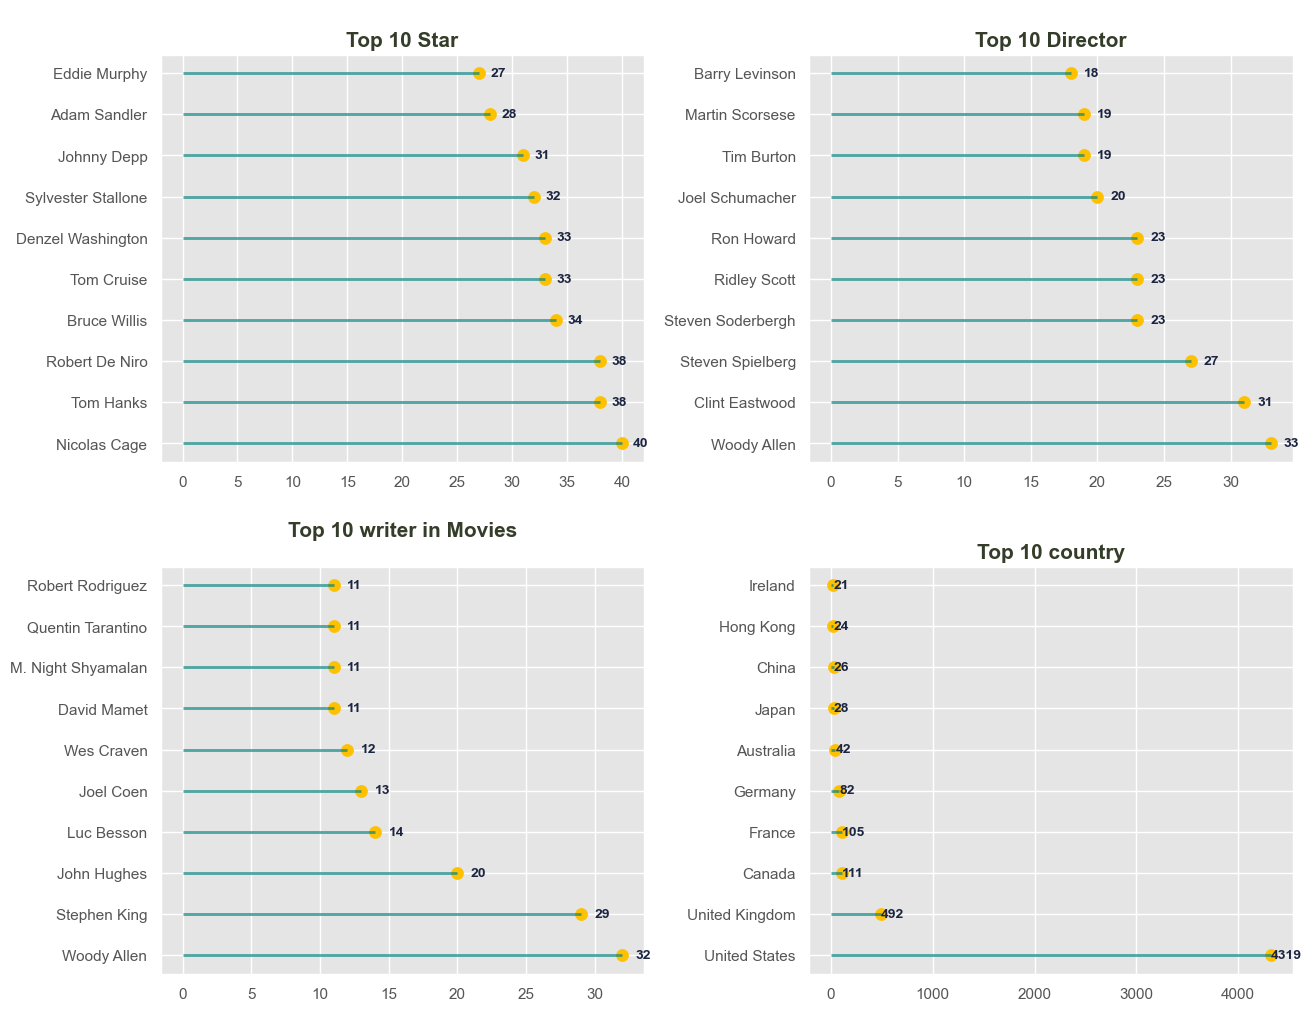

<Figure size 1200x800 with 0 Axes>

In [843]:
fig, axes = plt.subplots(2,2, figsize=(13, 10),  constrained_layout = True)

#Top 10 star
df_plot1 = pd.DataFrame({'genre': top_10_star.index,
                          'count': top_10_star.values})
axes[0,0].hlines(y=df_plot1['genre'], xmin=0, xmax=df_plot1['count'], color= '#06837f', alpha=0.7, linewidth=2)
axes[0,0].scatter(x=df_plot1['count'], y=df_plot1['genre'], s = 75, color='#fdc100')
axes[0,0].set_title('\nTop 10 Star', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot1['count']):
    axes[0,0].text(value+1, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

#Top 10 director
df_plot2 = pd.DataFrame({'director': top_10_director.index,
                          'count': top_10_director.values})
axes[0,1].hlines(y=df_plot2['director'], xmin=0, xmax=df_plot2['count'], color= '#06837f', alpha=0.7, linewidth=2)
axes[0,1].scatter(x=df_plot2['count'], y=df_plot2['director'], s = 75, color='#fdc100')
axes[0,1].set_title('\nTop 10 Director', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot2['count']):
    axes[0,1].text(value+1, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

#Top 10 writer
df_plot3 = pd.DataFrame({'writer': top_10_writer.index,
                          'count': top_10_writer.values})
axes[1,0].hlines(y=df_plot3['writer'], xmin=0, xmax=df_plot3['count'], color= '#06837f', alpha=0.7, linewidth=2)
axes[1,0].scatter(x=df_plot3['count'], y=df_plot3['writer'], s = 75, color='#fdc100')
axes[1,0].set_title('\nTop 10 writer in Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot3['count']):
    axes[1,0].text(value+1, i, value, va='center', fontsize=10, weight=600, color='#1c2541') 
    
#Top 10 country
df_plot4 = pd.DataFrame({'country': top_10_country.index,
                          'count': top_10_country.values})
axes[1,1].hlines(y=df_plot4['country'], xmin=0, xmax=df_plot4['count'], color= '#06837f', alpha=0.7, linewidth=2)
axes[1,1].scatter(x=df_plot4['count'], y=df_plot4['country'], s = 75, color='#fdc100')
axes[1,1].set_title('\nTop 10 country', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot4['count']):
    axes[1,1].text(value+1, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

plt.show() 
sns.set()  # Apply seaborn style
plt.tight_layout()

Text(0.5, 1.0, 'The Relationship Between votes and score')

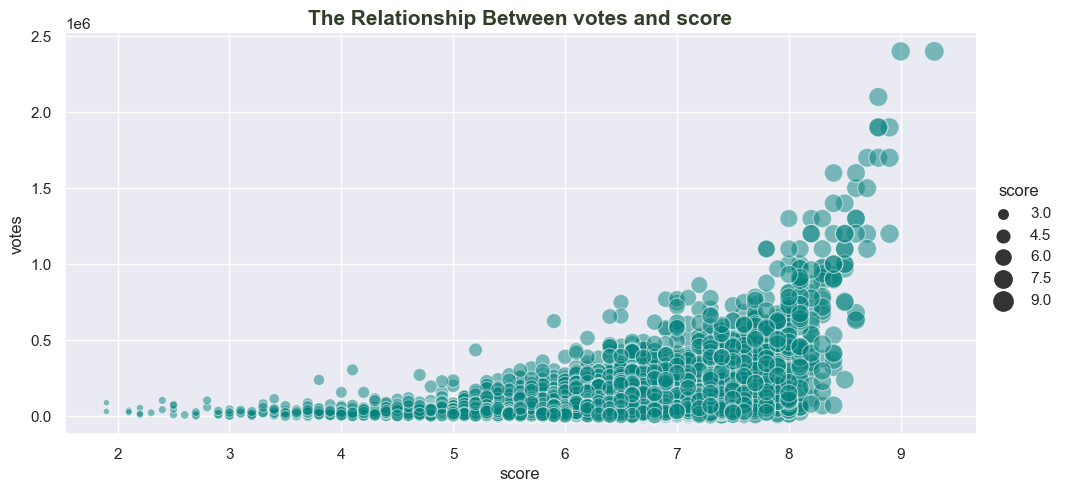

In [844]:
sns.relplot(data=df, x='score', y='votes', size='score',
            sizes=(20, 200), alpha=.5, aspect=2, color='#06837f')
plt.title('The Relationship Between votes and score', fontsize=15, weight=600, color='#333d29')

Text(0.5, 1.0, 'The Relationship Between Rating and score')

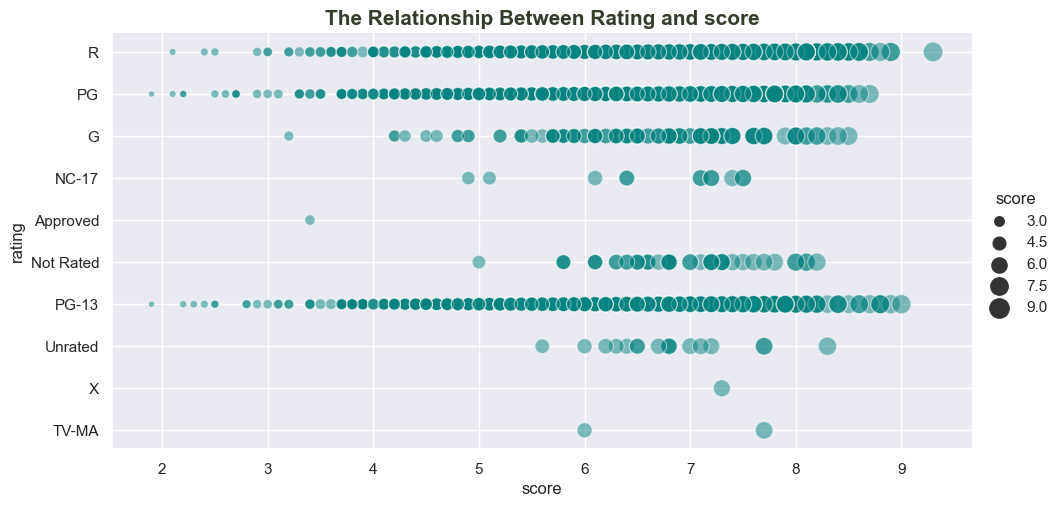

In [845]:
sns.relplot(data=df, x='score', y='rating', size='score',
            sizes=(20, 200), alpha=.5, aspect=2, color='#06837f')
plt.title('The Relationship Between Rating and score', fontsize=15, weight=600, color='#333d29')

Text(0.5, 1.0, 'The Relationship Between Rating and Votes')

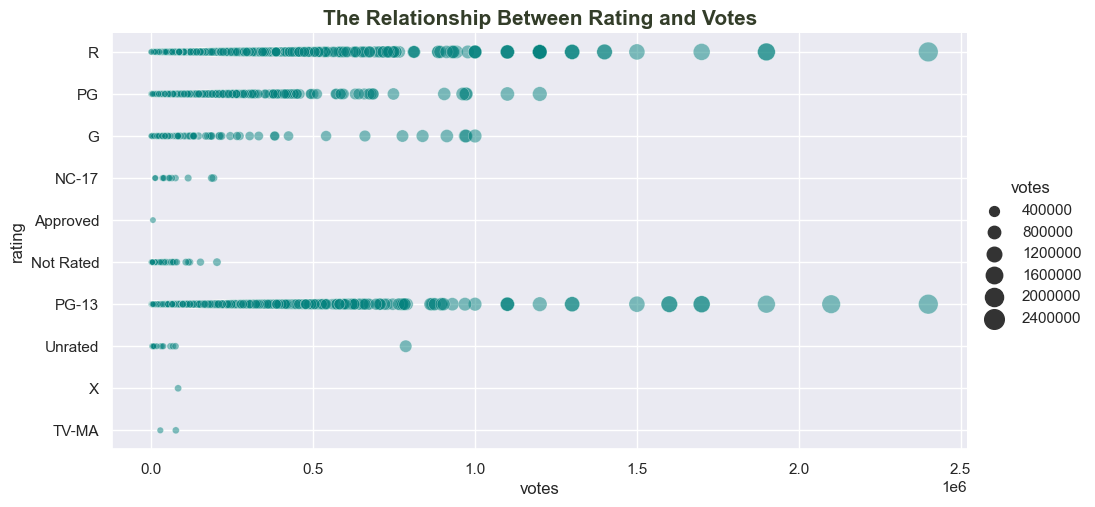

In [846]:
sns.relplot(data=df, x='votes', y='rating', size='votes',
            sizes=(20, 200), alpha=.5, aspect=2, color='#06837f')
plt.title('The Relationship Between Rating and Votes', fontsize=15, weight=600, color='#333d29')

In [847]:
genre_runtime = pd.DataFrame({'genre': df['genre'],
                          'runtime': df['runtime'].values})
genre_runtime.head(5)

,genre,runtime
0,Drama,146
1,Adventure,104
2,Action,124
3,Comedy,88
4,Comedy,98


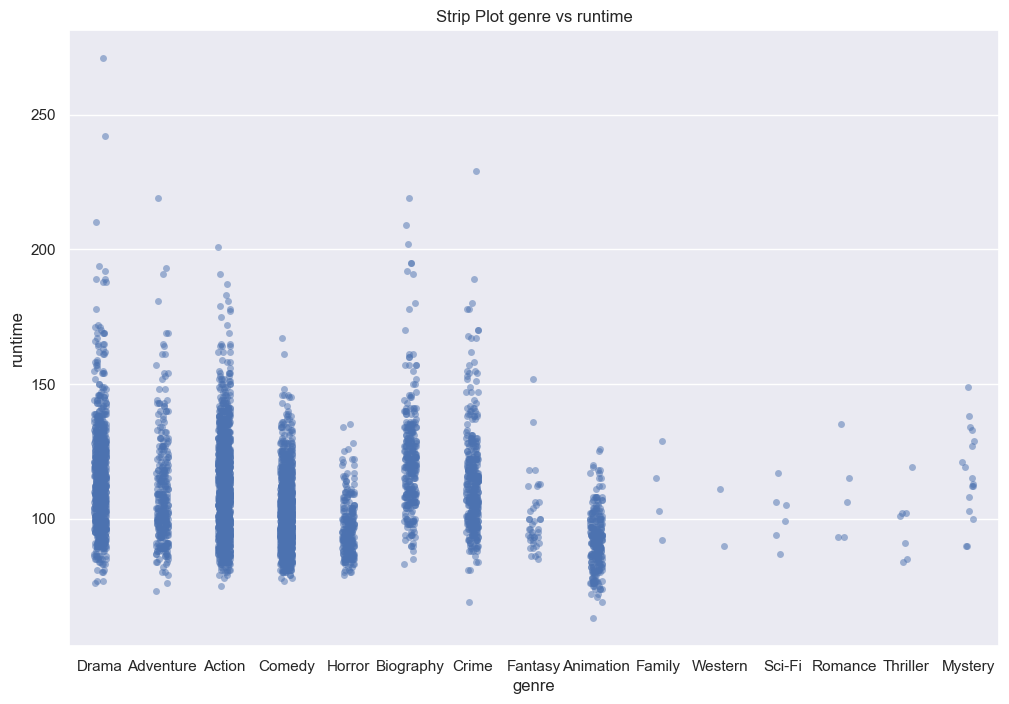

In [848]:
data = genre_runtime

# Create a strip plot
sns.stripplot(x='genre', y='runtime', data=data, jitter=True, alpha=0.5)

# Customize the plot
plt.xlabel('genre')
plt.ylabel('runtime')
plt.title('Strip Plot genre vs runtime')

# Display the plot
plt.show()

In [849]:
genre_votes = pd.DataFrame({'genre': df['genre'],
                          'votes': df['votes'].values})
genre_votes.head(5)

,genre,votes
0,Drama,927000
1,Adventure,65000
2,Action,1200000
3,Comedy,221000
4,Comedy,108000


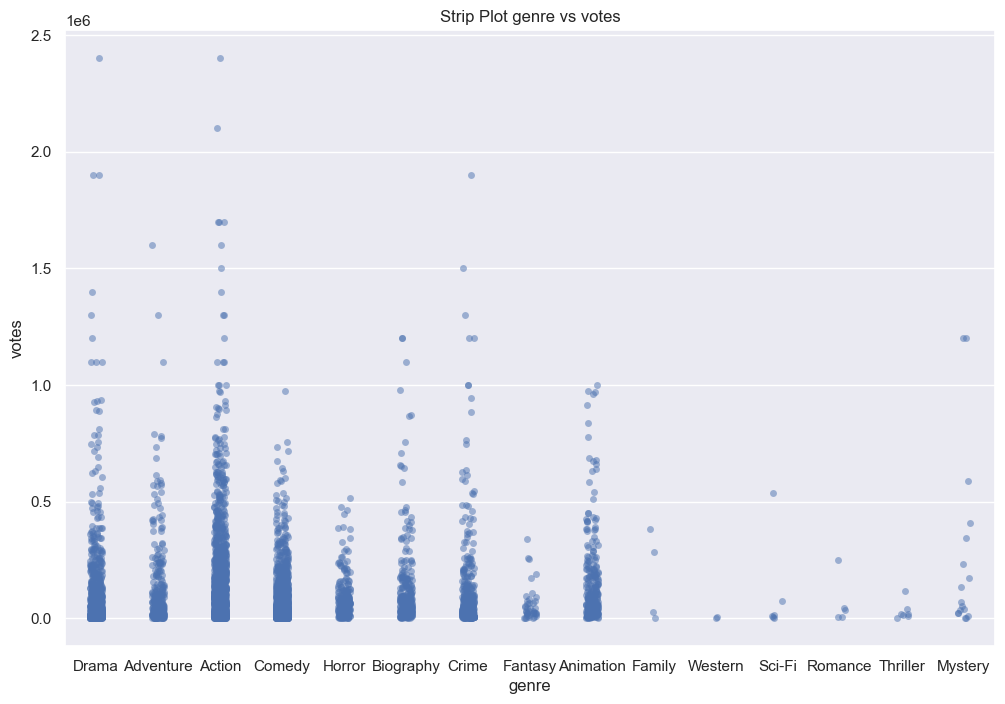

In [850]:
data = genre_votes

# Create a strip plot
sns.stripplot(x='genre', y='votes', data=data, jitter=True, alpha=0.5)

# Customize the plot
plt.xlabel('genre')
plt.ylabel('votes')
plt.title('Strip Plot genre vs votes')

# Display the plot
plt.show()

In [851]:
genre_budget = pd.DataFrame({'genre': df['genre'],
                          'budget': df['budget'].values})
genre_budget.head(5)

,genre,budget
0,Drama,19000000
1,Adventure,4500000
2,Action,18000000
3,Comedy,3500000
4,Comedy,6000000


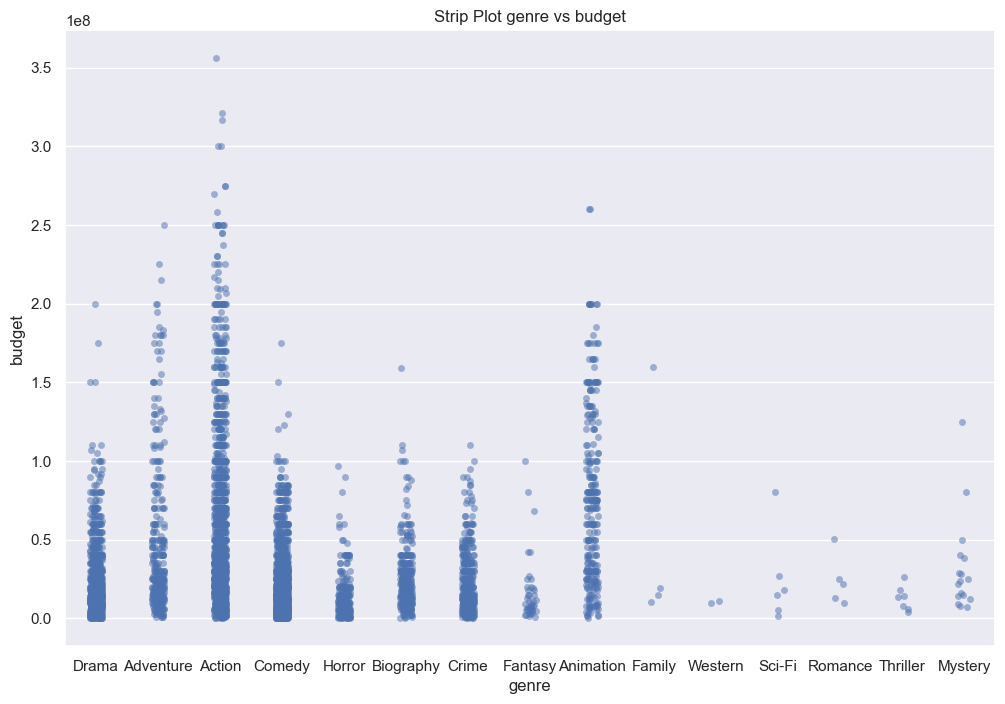

In [852]:
data = genre_budget

# Create a strip plot
sns.stripplot(x='genre', y='budget', data=data, jitter=True, alpha=0.5)

# Customize the plot
plt.xlabel('genre')
plt.ylabel('budget')
plt.title('Strip Plot genre vs budget')

# Display the plot
plt.show()

In [853]:
genre_gross = pd.DataFrame({'genre': df['genre'],
                          'gross': df['gross'].values})
genre_gross.head(5)

,genre,gross
0,Drama,46998772
1,Adventure,58853106
2,Action,538375067
3,Comedy,83453539
4,Comedy,39846344


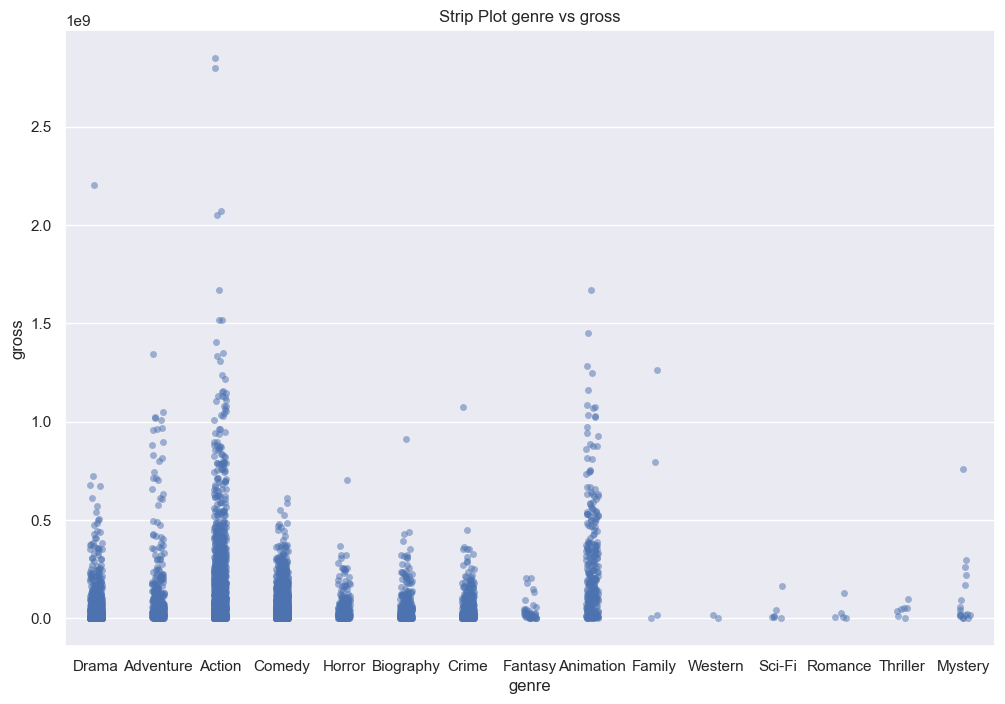

In [854]:
data = genre_gross

# Create a strip plot
sns.stripplot(x='genre', y='gross', data=data, jitter=True, alpha=0.5)

# Customize the plot
plt.xlabel('genre')
plt.ylabel('gross')
plt.title('Strip Plot genre vs gross')

# Display the plot
plt.show()

The movie genre that has the longest runtime is drama

The least popular genre in the top 5 is family, western, sci-fi, romance, thriller, and mystery

Action movies spent more money than the rest of the movies, meanwhile animation and advanture spent a similar budget to made

There is two action movies got a vast profit compared to the others genre

Text(0.5, 1.0, 'Total Released Movie by Year')

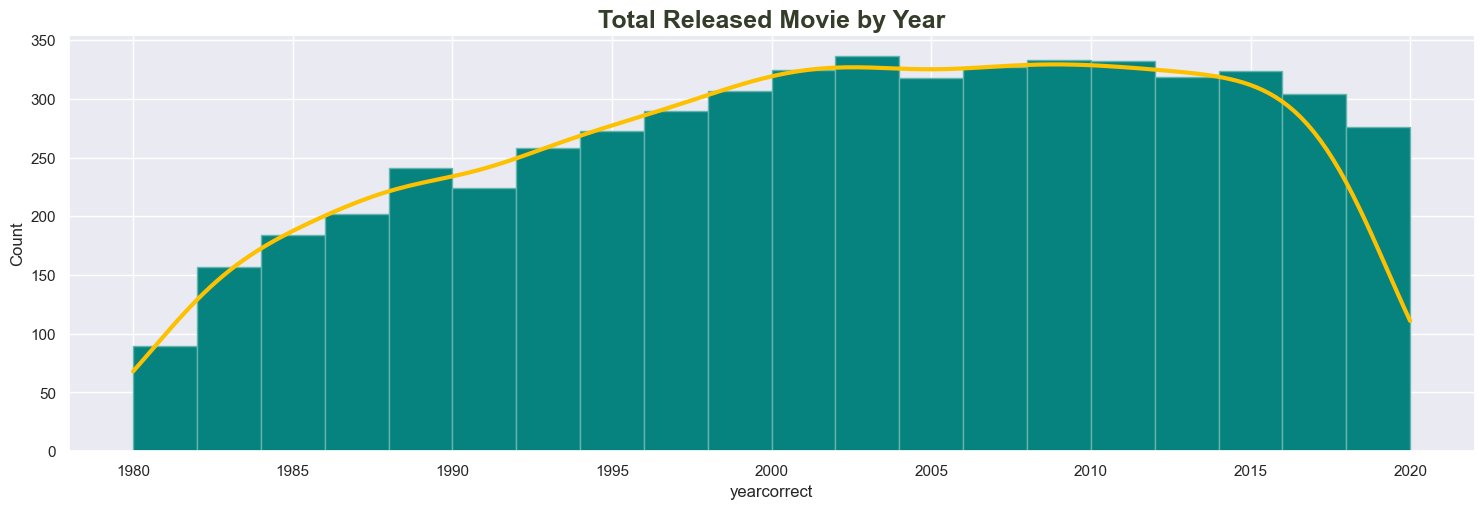

In [855]:
sns.displot(data=df, x='yearcorrect', kind='hist', kde=True,
            color='#fdc100', facecolor='#06837f', edgecolor='#64b6ac', line_kws={'lw': 3}, aspect=3)
plt.title('Total Released Movie by Year', fontsize=18, weight=600, color='#333d29')

In [857]:
df.dtypes

name            object
rating          object
genre           object
released        object
score          float64
votes            int64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime          int64
yearcorrect      int32
dtype: object

In [858]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 9
Integer variables: 1
Float variables: 1


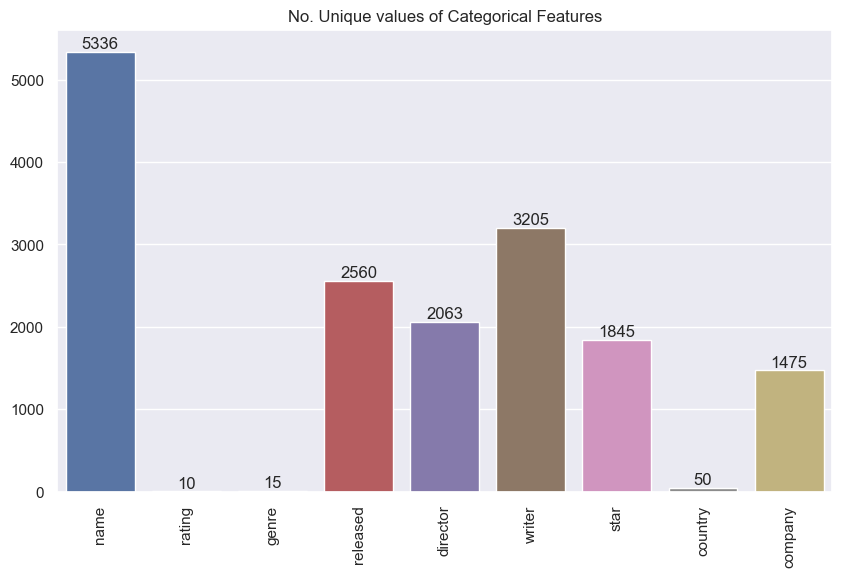

In [859]:
unique_values = []
for col in object_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
ax = sns.barplot(x=object_cols,y=unique_values)
for i in ax.containers:
    ax.bar_label(i,)

In [860]:
#pearson method (default)
df.corr(method='pearson')

C:\Users\USER\AppData\Local\Temp\ipykernel_2184\1959881439.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,score,votes,budget,gross,runtime,yearcorrect
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [861]:
#kendall method
df.corr(method='kendall')

C:\Users\USER\AppData\Local\Temp\ipykernel_2184\4250920445.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


,score,votes,budget,gross,runtime,yearcorrect
score,1.000000,0.350185,-0.006406,0.124943,0.292254,0.043400
votes,0.350185,1.000000,0.346274,0.553625,0.205344,0.293044
budget,-0.006406,0.346274,1.000000,0.512057,0.231278,0.213719
gross,0.124943,0.553625,0.512057,1.000000,0.176979,0.232372
runtime,0.292254,0.205344,0.231278,0.176979,1.000000,0.064793
yearcorrect,0.043400,0.293044,0.213719,0.232372,0.064793,1.000000


In [862]:
#spearman method
df.corr(method='spearman')

C:\Users\USER\AppData\Local\Temp\ipykernel_2184\3286032676.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,score,votes,budget,gross,runtime,yearcorrect
score,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
yearcorrect,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_2184\3950554718.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


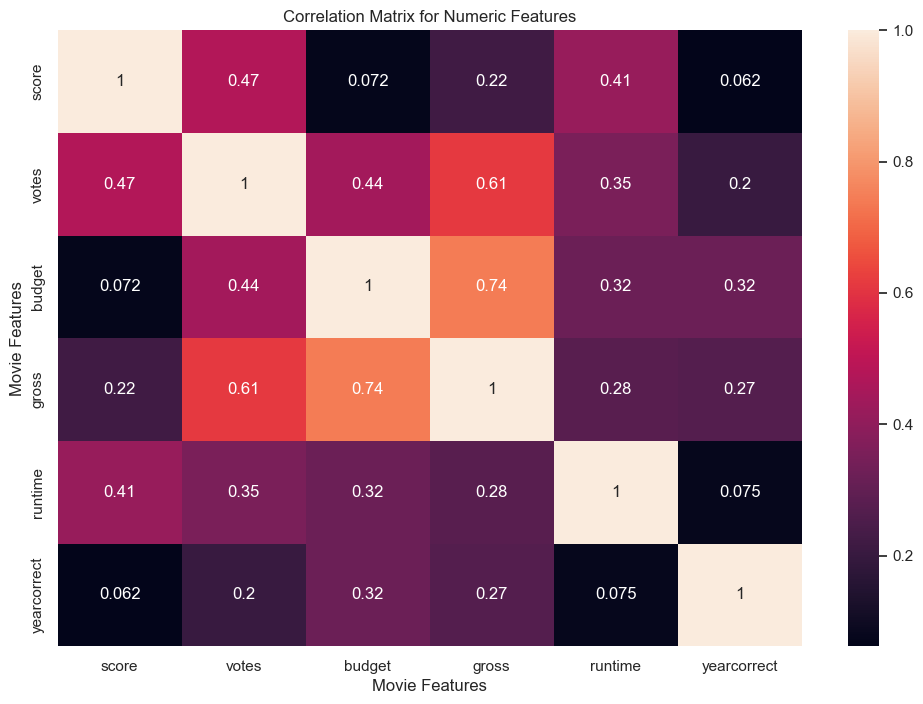

In [863]:
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [864]:
#Convert Categorical Variable to Numeric
df_numerized = df

for col_name in df_numerized:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1980
1,3929,6,1,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1980
2,3641,4,0,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1980
3,204,4,4,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1980
4,732,6,4,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1980


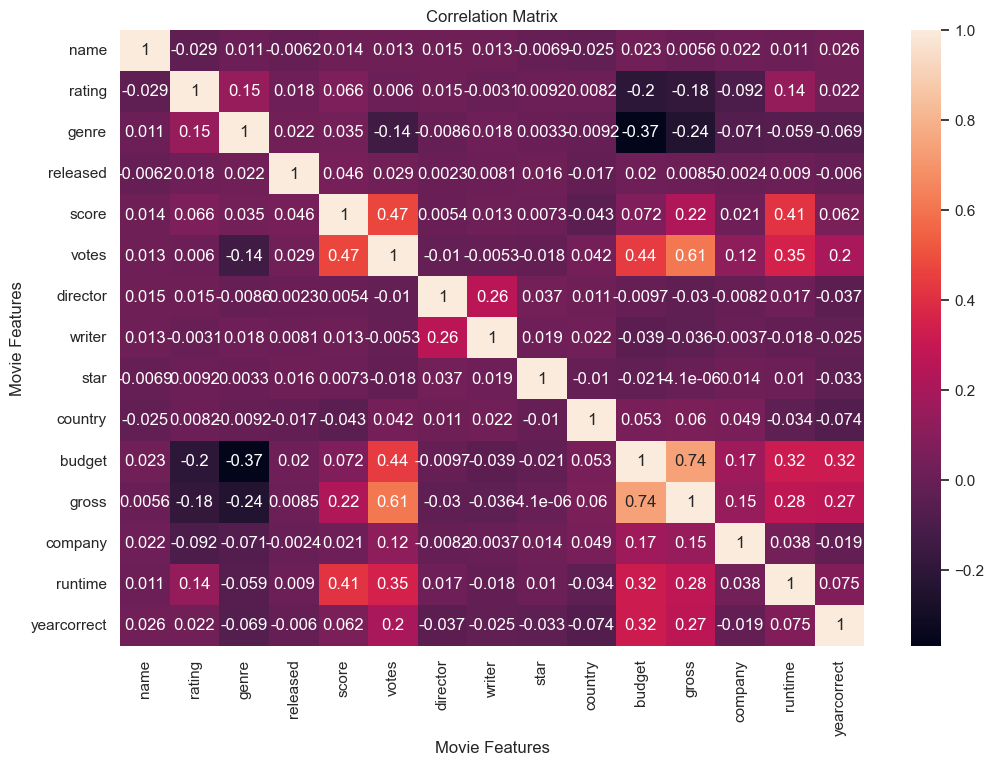

In [865]:
corr_matrix = df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [866]:
df_numerized.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029234,0.010996,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
released,-0.006152,0.018083,0.022142,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687
country,-0.025490,0.008230,-0.009164,-0.017228,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.073569


In [867]:
corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
             budget        -0.203946
             gross         -0.181906
 

In [868]:
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs

name         name           1.000000
rating       rating         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
genre        genre          1.000000
writer       writer         1.000000
yearcorrect  yearcorrect    1.000000
gross        budget         0.740247
budget       gross          0.740247
votes        gross          0.614751
gross        votes          0.614751
score        votes          0.474256
votes        score          0.474256
             budget         0.439675
budget       votes          0.439675
runtime      score          0.414068
score        runtime        0.414068
votes        runtime        0.352303
runtime      votes          0.352303
y

In [869]:
hi_corr = sorted_pairs[(sorted_pairs!= 1) & (sorted_pairs > 0.5)]
hi_corr

gross   budget    0.740247
budget  gross     0.740247
votes   gross     0.614751
gross   votes     0.614751
dtype: float64

The greatest correlation is

budget and gross          0.740247

votes and gross          0.614751